# Iris Flower Classification

In [22]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split as tts,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [23]:
# read the dataset
df = pd.read_csv("D:/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# shape of the dataset
df.shape

(150, 6)

In [25]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
# checking for duplicate values
df.duplicated().sum()

0

In [27]:
# checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

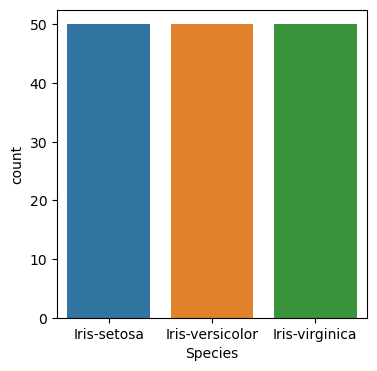

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [28]:
# visualising target feature through countplot
plt.figure(figsize = (4,4))
sns.countplot(x = 'Species', data = df)
plt.show()
df['Species'].value_counts()

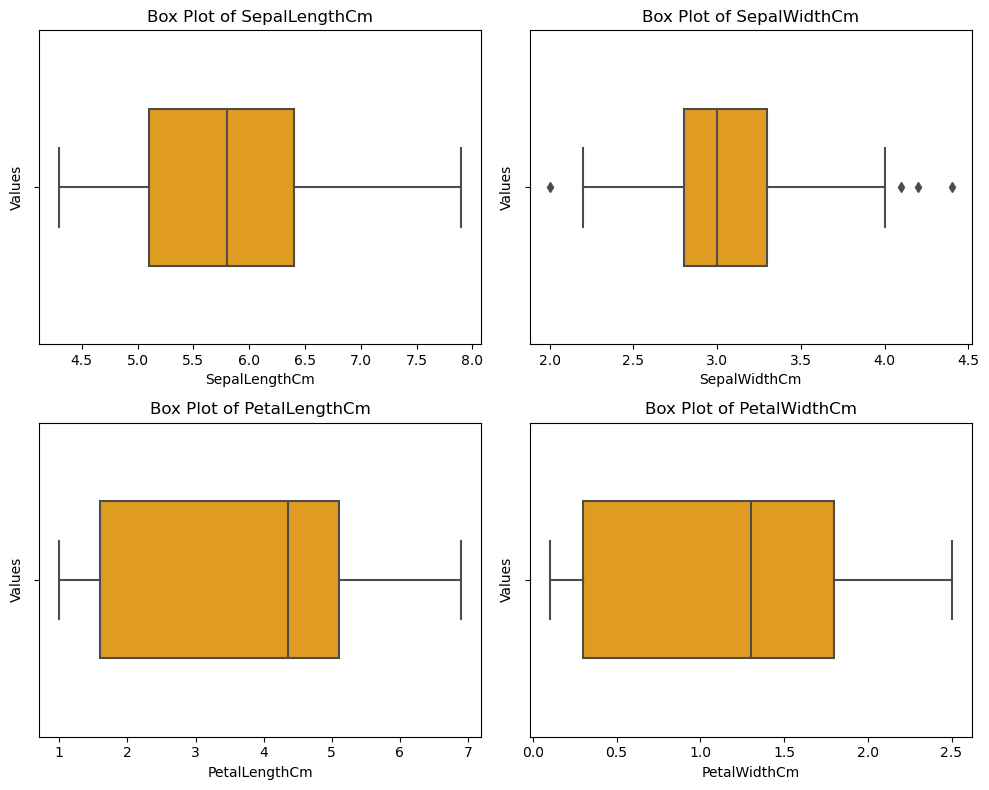

In [29]:
# visualising continuous variables through box plot
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x=feature, data=df, ax=axes[i], width=0.5, linewidth=1.5, color='orange')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')
plt.tight_layout()
plt.show()

In [30]:
# Removing Id column from the dataset
df.drop(['Id'], axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# Univariate analysis
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# converting target variable to numerical form
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head(80)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
75,6.6,3.0,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
77,6.7,3.0,5.0,1.7,1
78,6.0,2.9,4.5,1.5,1


<Axes: >

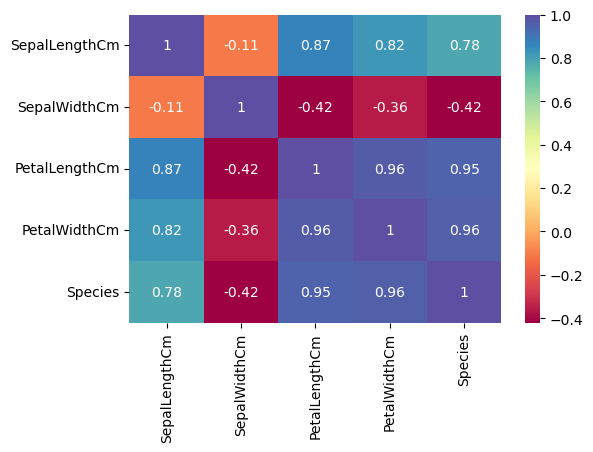

In [12]:
# Bivariate Analysis
# correlation analysis of the dataset
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(),annot = True,cmap='Spectral')

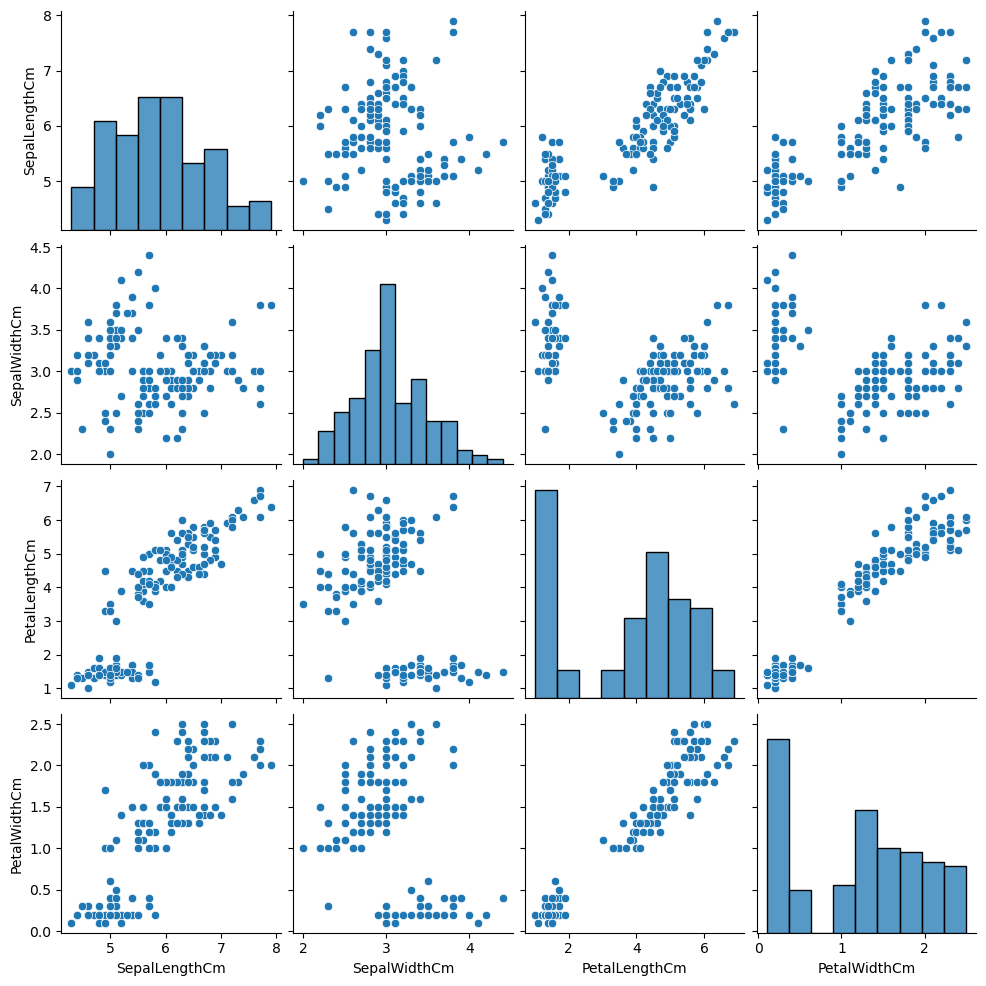

In [33]:
# Visualisation through pair plot
sns.pairplot(df)

In [13]:
# scaling the numerical features
scaler = MinMaxScaler()
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] = scaler.fit_transform(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [14]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
# separating independent and dependent variables
x = df.drop(['Species'], axis = 1)
y = df['Species']

In [16]:
# splitting the data as train and test set
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
# fit the model
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
# training score
DT.score(x_train,y_train)

1.0

In [19]:
# evaluate the model
y_pred = DT.predict(x_test)
print(y_pred)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Classification report:',classification_report(y_test,y_pred))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy score: 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



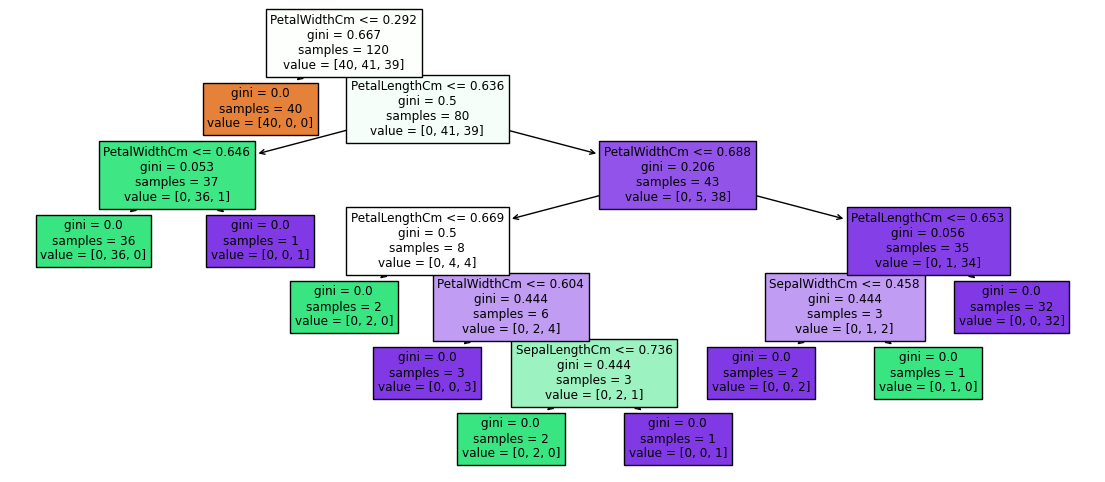

In [20]:
# visualise the decision tree
plt.figure(figsize =(14,6))
plot_tree(DT,feature_names = list(x_train.columns),filled = True)
plt.show()

In [21]:
# sample prediction
new_sample= np.array([5.6,3.0,3.4,1.2])
new_sample = new_sample.reshape(1,-1)
y_pred = DT.predict(new_sample)
if y_pred == 0:
    print('Iris-setosa')
elif y_pred == 1:
    print('Iris-versicolor')
elif y_pred == 2:
    print('Iris-virginica')

Iris-virginica
